In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import re
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

In [18]:
stopword = stopwords.words('english')
stemmer = LancasterStemmer()
lem = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer("english")


In [30]:
!pip3 install -U sentence-transformers

    100% |████████████████████████████████| 71kB 50kB/s ta 0:00:017
    100% |████████████████████████████████| 1.8MB 44kB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 54kB/s ta 0:00:01
    24% |███████▊                        | 188.2MB 47kB/s eta 3:27:43^C5:1022 4% |█▌                              | 37.4MB 49kB/s eta 4:11:05

Operation cancelled by user


In [7]:
from sklearn.cluster import KMeans

In [8]:
from sentence_transformers import SentenceTransformer


/home/archibold/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/archibold/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/archibold/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/archibold/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [9]:
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [10]:
data = pd.DataFrame(pd.read_csv("Knowledge base - pizza inn.csv"))
user_text = data["user text"].to_list()

In [25]:
user_text

['where are you located',
 'What is Terrific Tuesday?',
 'What is your Phone Number',
 'What time do you close?',
 'Do you do delivery?',
 'What types of Pizza are on offer?',
 'What is sizes of pizza do you offer',
 'Do you currently run any promotions?',
 'Do you do mass deliveries for parties?',
 'Do you cater for parties?',
 'Do you do parties?',
 'Do you have any side dishes?',
 'Can I order a combo from both Pizza Inn and Chicken Inn']

In [31]:
processed_msgs = []


for sent in user_text:
    sent_tok = word_tokenize(sent)
    sent = [lem.lemmatize(word) for word in sent_tok]
    sent_full = " ".join([w for w in sent])
    processed_msgs.append(sent_full)
    pass
processed_msgs

['where are you located',
 'What is Terrific Tuesday ?',
 'What is your Phone Number',
 'What time do you close ?',
 'Do you do delivery ?',
 'What type of Pizza are on offer ?',
 'What is size of pizza do you offer',
 'Do you currently run any promotion ?',
 'Do you do mass delivery for party ?',
 'Do you cater for party ?',
 'Do you do party ?',
 'Do you have any side dish ?',
 'Can I order a combo from both Pizza Inn and Chicken Inn']

In [33]:
# category = []
# texts = []

# with open("data.txt", "r") as file:
#     lines = file.readlines()
#     for line in lines:
#         data = line.split(":")
#         category.append(data[0])
#         new_string = re.sub("[^a-zA-Z]+", " ", data[1:][0])
# #         print(new_string)
#         texts.append(new_string)

In [28]:
sentence_embeddings = model.encode(processed_msgs)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [214]:
sentence_embeddings.shape

(13, 768)

/home/archibold/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/archibold/.local/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


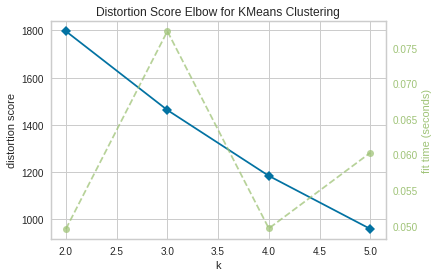

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [230]:
model_viz = KMeans()
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model_viz, k=(2,6))

visualizer.fit(sentence_embeddings)
visualizer.show() 

In [102]:
# model_viz = AgglomerativeClustering()
# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(model_viz, k=(2,5))

# visualizer.fit(sentence_embeddings)
# visualizer.show()

In [216]:
elbow_value = visualizer.elbow_value_
print("Elbow value -> ", elbow_value)

Elbow value ->  None


In [249]:
Kmean = KMeans(n_clusters=5,  init='random', max_iter=1000, n_init=1, verbose=1)
clusters = Kmean.fit_predict(sentence_embeddings)

print("============================================")


dic = {}
for group, text in zip(clusters, user_text):
#     print(group, text)
    value_group = dic.get(group)
#     print(value_group)
    if value_group is None:
        new_group = []
        new_group.append(text)
        dic[group] = new_group
        pass
    else:
        value_group.append(text)
        dic[group] = value_group
        
for i in dic.keys():
    for text in dic.get(i):
        print(text)
    print("\n")

Initialization complete
Iteration 0, inertia 2212.385498046875
Iteration 1, inertia 1121.32177734375
Converged at iteration 1: strict convergence.
where are you located
What is Terrific Tuesday?


What is your Phone Number
What time do you close?


Do you do delivery?
Do you currently run any promotions?
Do you do mass deliveries for parties?
Do you cater for parties?
Do you do parties?


What types of Pizza are on offer?
What is sizes of pizza do you offer


Do you have any side dishes?
Can I order a combo from both Pizza Inn and Chicken Inn




In [236]:
clusters

array([3, 3, 3, 3, 3, 1, 1, 3, 2, 2, 2, 0, 1], dtype=int32)

In [250]:
import spacy
from gensim.summarization import keywords
nlp = spacy.load("en_core_web_sm")
candidate_pos = ['NOUN', 'PROPN', 'VERB']

In [252]:
for i in dic.keys():
    test = dic.get(i)
    text_sent = " ".join([w for w in test])
    words = keywords(text_sent).split('\n')
    print(words)

['']
['']
['']
['']
['']


where are you located
What is Terrific Tuesday?
What is your Phone Number
What time do you close?
Do you do delivery?
Do you currently run any promotions?


What types of Pizza are on offer?
What is sizes of pizza do you offer
Can I order a combo from both Pizza Inn and Chicken Inn


Do you do mass deliveries for parties?
Do you cater for parties?
Do you do parties?


Do you have any side dishes?




In [170]:
def find_similar(vector_representation, all_representations, k=1):
    similarity_matrix = cosine_similarity(vector_representation, all_representations)
    np.fill_diagonal(similarity_matrix, 0)
    similarities = similarity_matrix[0]
    if k == 1:
        return [np.argmax(similarities)]
    elif k is not None:
        return np.flip(similarities.argsort()[-k:][::1])

In [229]:
ent_emb_single = model.encode(["where are you located"])
distilbert_similar_indexes = find_similar(ent_emb_single, sentence_embeddings, 2)
print("5 most similar descriptions using Sentence-Bert \n")
for index in distilbert_similar_indexes:
    print(user_text[index])

5 most similar descriptions using Sentence-Bert 

What time do you close?
Do you currently run any promotions?
